<a href="https://colab.research.google.com/github/luadeprataart/Reconhecimento-de-Padroes/blob/main/Desenvolvimento_de_Sistemas_de_IA_para_An%C3%A1lise_e_Previs%C3%A3o_de_Dados_no_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Desenvolvimento de Sistemas de IA para Análise e Previsão de Dados no Kaggle**


# Parte 1: Tarefa de Regressão -> 5 pontos

Nesta parte do projeto, vocês selecionarão uma base de dados adequada para uma tarefa de regressão. Alguns exemplos incluem previsão de preços de imóveis, previsão de vendas, ou qualquer conjunto de dados que envolva a previsão de um valor numérico. Vocês seguirão os seguintes passos:

1.Seleção de Dados: Escolha uma base de dados apropriada no Kaggle para a tarefa de regressão. A base precisa passar por uma aprovação do professor.

2.Pré-processamento: Realize pré-processamento de dados, incluindo tratamento de valores ausentes, codificação de variáveis categóricas e normalização.

3.Análise Exploratória de Dados (EDA): Realize uma análise exploratória dos dados para entender a relação entre as variáveis e identificar padrões.

4.Modelos de Regressão: Implemente 3 modelos de regressão, utilizando Regressão Linear, Árvore de Decisão e Redes Neurais, para prever o valor-alvo.

5.Avaliação e Apresentação: Avalie o desempenho dos modelos e prepare uma apresentação detalhando o processo, os resultados e as conclusões.

# Parte 2: Tarefa de Classificação -> 5 pontos

Nesta parte do projeto, vocês selecionarão uma base de dados adequada para uma tarefa de classificação. Isso pode incluir a classificação de produtos, avaliação de sentimentos em revisões, ou qualquer conjunto de dados de classificação de interesse. Vocês seguirão os seguintes passos:

1.Seleção de Dados: Escolha uma base de dados apropriada no Kaggle para a tarefa de classificação. A base precisa passar por uma aprovação do professor.

2.Pré-processamento: Realize o pré-processamento de dados, tratamento de desequilíbrio de classes e outras etapas relevantes.

3.Análise Exploratória de Dados (EDA): Realize uma análise exploratória dos dados para extrair insights e entender a distribuição das classes.

4.Modelos de Classificação: Implemente 3 modelos de classificação, utilizando Naive Bayes, KNN, e Redes Neurais, para classificar os dados.

5.Avaliação e Apresentação: Avalie o desempenho dos modelos de classificação e prepare uma apresentação destacando o processo, as métricas de avaliação e as conclusões.

**1.Seleção de Dados:**

In [3]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('/content/drive/MyDrive/datasets/World University Rankings 2023.csv', sep=',', index_col=None)

df_dataset.shape

(2341, 13)

**2.Pré-processamento**

In [5]:
display(df_dataset.head(n=6))

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


In [6]:
display(df_dataset.describe())

,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,2208.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,19.000408,27.018010,23.016898,48.495887,47.104558,46.880378
std,12.132224,13.282243,16.763819,27.967185,15.093682,22.582401
min,0.400000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,12.600000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,16.600000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,22.200000,31.850000,28.900000,72.350000,48.300000,62.100000
max,232.200000,94.800000,99.700000,100.000000,100.000000,99.700000


In [7]:
df_dataset.replace('', pd.NA, inplace=True) #Tratando espaços vazios para null
df_dataset.isnull().sum() #Contagem de quantos dados faltantes existem nos dados

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

In [8]:
df_dataset[df_dataset.isnull().any(axis=1)]

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
10,11,Columbia University,United States,"21,781",4.5,38%,NaN,89.4,89.4,87.7,97.1,44.8,79.9
15,16,Tsinghua University,NaN,"38,324",11.6,10%,NaN,88.2,90.1,97.4,88.0,100.0,40.3
16,17,Peking University,NaN,"31,994",10.3,19%,NaN,88.1,92.5,96.7,80.4,91.8,65.0
18,19,National University of Singapore,NaN,"32,337",19.8,25%,51 : 49,87.1,76.4,93.0,90.2,87.0,94.0
29,30,Technical University of Munich,NaN,"33,960",40.6,36%,37 : 63,79.3,69.8,82.2,84.5,100.0,77.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6


In [9]:
df_removed = df_dataset.drop(columns=['Name of University','Location'])

#Removendo a coluna Name of University pois é um dado qualitativo e nominal não contribuindo muito para o dataset
#removendo a coluna Location pois tem 294 dados faltantes o que dificulta utiliza-lo para prerdição

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos scatter
#sns.pairplot(df_removed, hue='University Rank', height=3.5);
#plt.show()

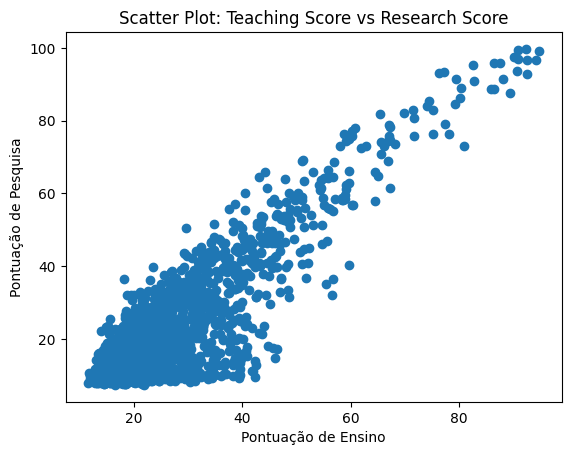

In [11]:
# Gráfico de Dispersão
plt.scatter(df_removed['Teaching Score'], df_removed['Research Score'])
plt.xlabel('Pontuação de Ensino')
plt.ylabel('Pontuação de Pesquisa')
plt.title('Scatter Plot: Teaching Score vs Research Score')
plt.show()

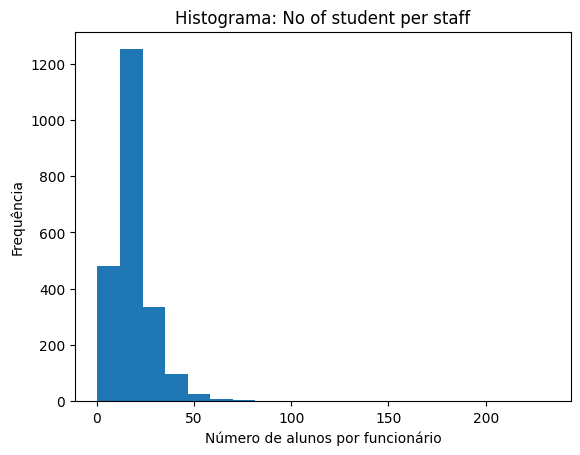

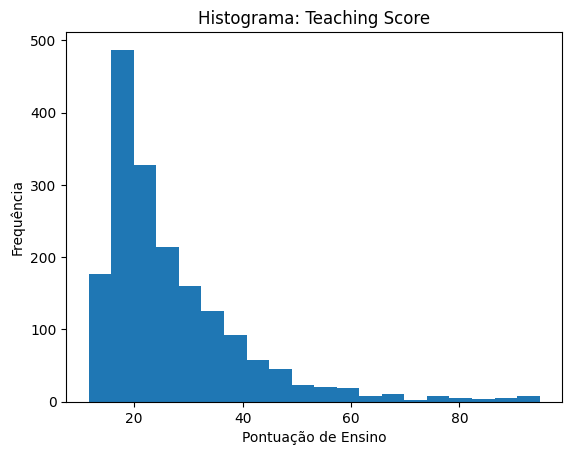

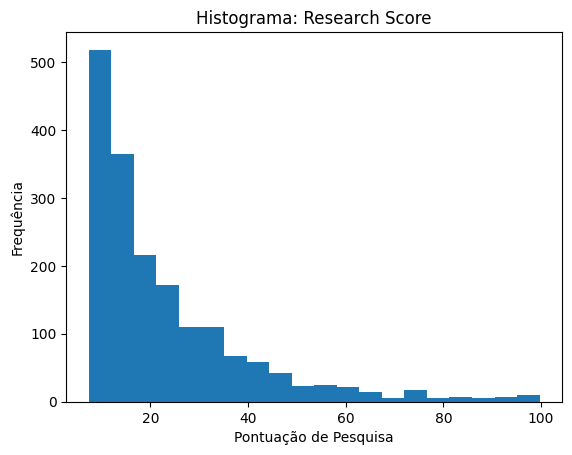

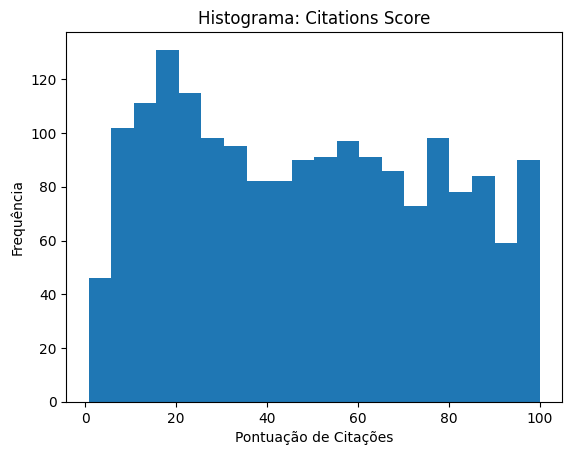

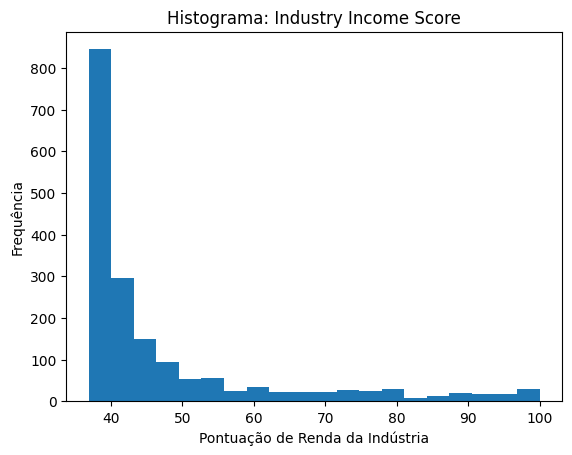

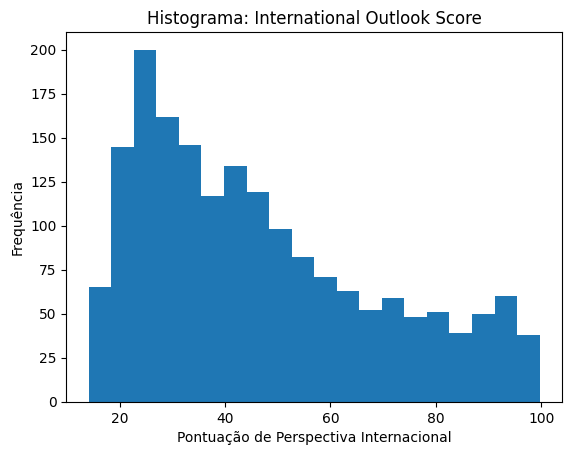

In [12]:
# Histograma
plt.hist(df_removed['No of student per staff'], bins=20) #intervalo de 20
plt.xlabel('Número de alunos por funcionário')
plt.ylabel('Frequência')
plt.title('Histograma: No of student per staff')
plt.show()

plt.hist(df_removed['Teaching Score'], bins=20) #intervalo de 20
plt.xlabel('Pontuação de Ensino')
plt.ylabel('Frequência')
plt.title('Histograma: Teaching Score')
plt.show()

plt.hist(df_removed['Research Score'], bins=20) #intervalo de 20
plt.xlabel('Pontuação de Pesquisa')
plt.ylabel('Frequência')
plt.title('Histograma: Research Score')
plt.show()


plt.hist(df_removed['Citations Score'], bins=20) #intervalo de 20
plt.xlabel('Pontuação de Citações')
plt.ylabel('Frequência')
plt.title('Histograma: Citations Score')
plt.show()


plt.hist(df_removed['Industry Income Score'], bins=20) #intervalo de 20
plt.xlabel('Pontuação de Renda da Indústria')
plt.ylabel('Frequência')
plt.title('Histograma: Industry Income Score')
plt.show()


plt.hist(df_removed['International Outlook Score'], bins=20) #intervalo de 20
plt.xlabel('Pontuação de Perspectiva Internacional')
plt.ylabel('Frequência')
plt.title('Histograma: International Outlook Score')
plt.show()



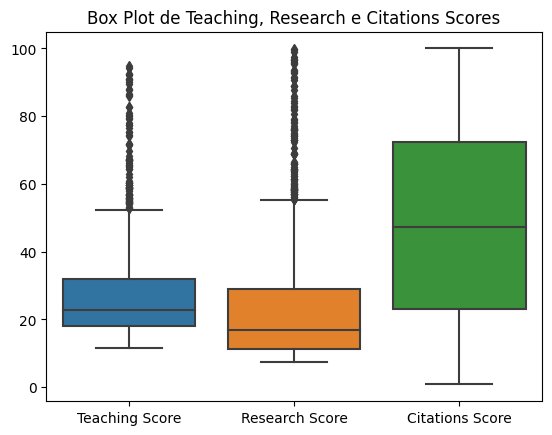

In [13]:
# Box Plot
sns.boxplot(data=df_removed[['Teaching Score', 'Research Score', 'Citations Score']])
plt.title('Box Plot de Teaching, Research e Citations Scores')
plt.show()

#Nota-se um grande nuemro de outliers no teaching score e no research score

<ipython-input-14-0ee11c2bfb75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_removed.corr()


,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
No of student per staff,1.000000,-0.130569,0.006686,-0.005684,-0.002588,0.029470
Teaching Score,-0.130569,1.000000,0.882181,0.451169,0.492579,0.385006
Research Score,0.006686,0.882181,1.000000,0.514013,0.583051,0.537993
Citations Score,-0.005684,0.451169,0.514013,1.000000,0.182949,0.536379
Industry Income Score,-0.002588,0.492579,0.583051,0.182949,1.000000,0.218060
International Outlook Score,0.029470,0.385006,0.537993,0.536379,0.218060,1.000000


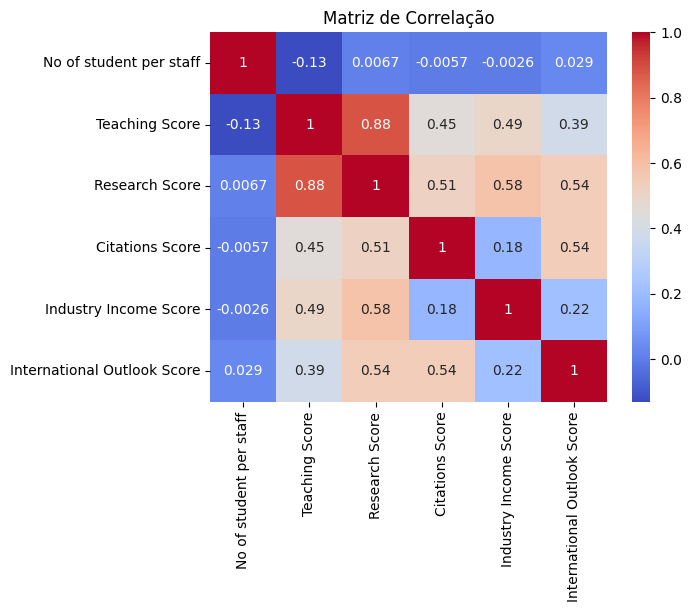

In [14]:
# Matriz de Correlação (Heatmap)
correlation_matrix = df_removed.corr()

display(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#Observa-se que research score e teaching score tem uma relação muito alta entre eles, ou seja quando uma variável
#aumenta, a outra tende a aumentar também.

#Citantions score e No of students per staff tem relação quase zero entre si, assim como research score e No of students per staff
# e industry income score e No of students per staff

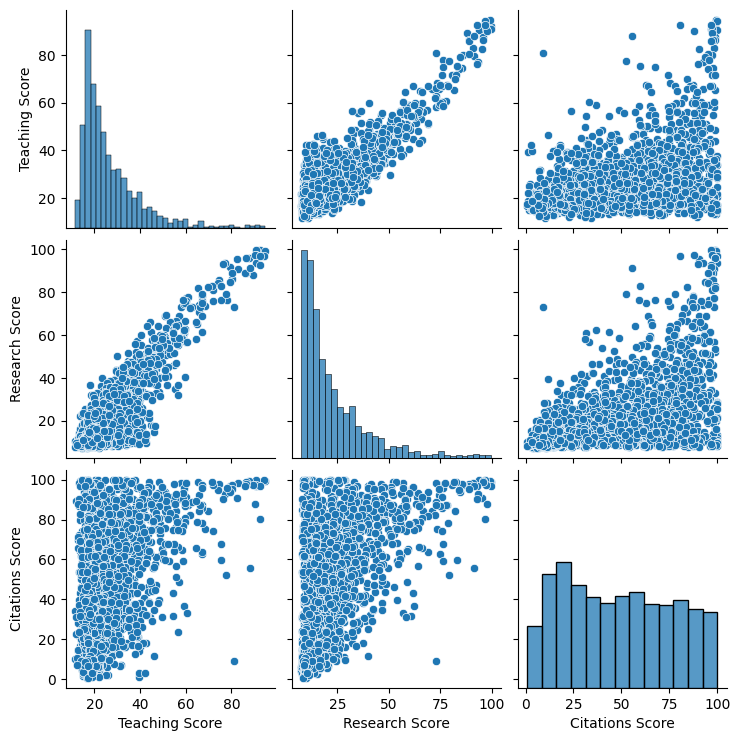

In [15]:
# Gráfico de Caixas Emparelhadas (Pairplot)
sns.pairplot(df_removed, vars=['Teaching Score', 'Research Score', 'Citations Score'])
plt.show()

#São gráficos de dispersão para todos os pares possíveis de variáveis numéricas em um conjunto de dados e também exibe histogramas nas
#diagonais para mostrar a distribuição de cada variável individual.

#Como observado anteriormente research score e teaching score mantem uma relação muito forte e linear entre si
#Os dados não apresentam outliers visiveis
#

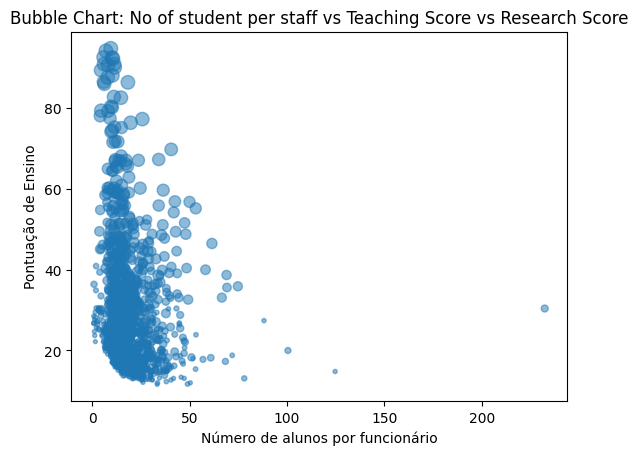

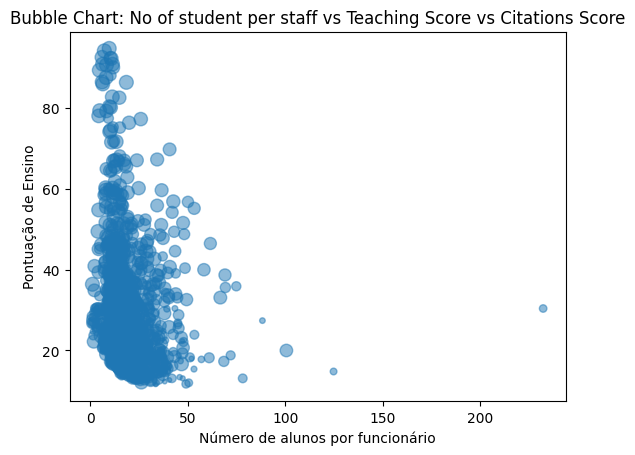

In [16]:
# Gráfico de Bolhas (Bubble Chart)
plt.scatter(df_removed['No of student per staff'], df_removed['Teaching Score'], s=df_removed['Research Score'], alpha=0.5)
plt.xlabel('Número de alunos por funcionário')
plt.ylabel('Pontuação de Ensino')
plt.title('Bubble Chart: No of student per staff vs Teaching Score vs Research Score')
plt.show()

#É possivel analisar um outlier no dado mas a grande maioria se ve de maneira concentrada

plt.scatter(df_removed['No of student per staff'], df_removed['Teaching Score'], s=df_removed['Citations Score'], alpha=0.5)
plt.xlabel('Número de alunos por funcionário')
plt.ylabel('Pontuação de Ensino')
plt.title('Bubble Chart: No of student per staff vs Teaching Score vs Citations Score')
plt.show()


[0 2 1 'NaN']


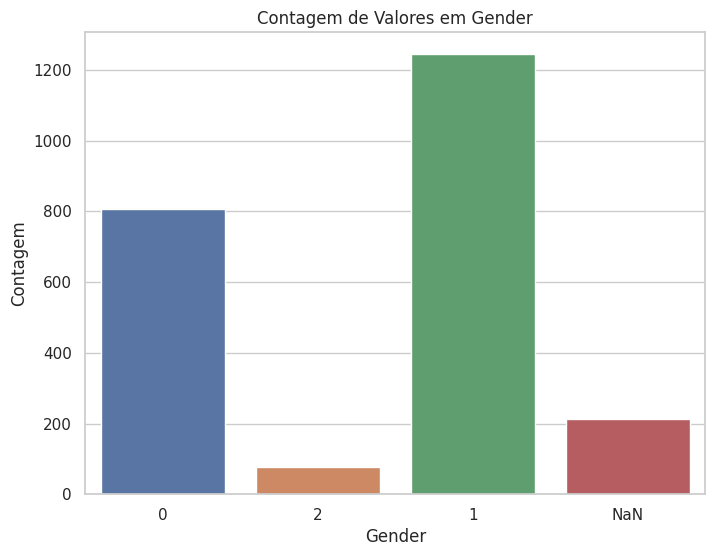

,University Rank,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Gender
0,1,"20,965",10.6,42%,96.4,92.3,99.7,99.0,74.9,96.2,0
1,2,"21,887",9.6,25%,95.2,94.8,99.0,99.3,49.5,80.5,2
2,3,"20,185",11.3,39%,94.8,90.9,99.5,97.0,54.2,95.8,0
3,3,"16,164",7.1,24%,94.8,94.2,96.7,99.8,65.0,79.8,0
4,5,"11,415",8.2,33%,94.2,90.7,93.6,99.8,90.9,89.3,0
...,...,...,...,...,...,...,...,...,...,...,...
2336,-,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8,1
2337,-,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7,1
2338,-,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0,1
2339,-,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6,1


In [17]:
#Trantando os dados de Female:Male Ratio

#Modificando o valor de string para int
def define_gender(ratio):
    if pd.isna(ratio) or ratio.lower() == 'nan':
        return 'NaN'  # Valor nulo ou inválido

    female, male = map(int, ratio.split(' : '))

    if male == 0 and female > 0:
        return 1 # Valor nulo ou inválido

    if male == 0 :
        return 'NaN' # Valor nulo ou inválido

    if male == female:
      return 2

    if female / male > 1:
        return 1  #mais mulheres
    else:
        return 0  #mais Homens


# Aplicando a função para criar a nova coluna "Gender"
df_removed['Gender'] = df_removed['Female:Male Ratio'].apply(define_gender)


#Analisando a nova coluina Gender
unique_values = df_removed['Gender'].unique()
print(unique_values)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_removed, x="Gender")
plt.title("Contagem de Valores em Gender")
plt.xlabel("Gender")
plt.ylabel("Contagem")

plt.show()


#Substituindo os valores nulos pela moda (1)
df_filled = df_removed.drop(columns=['Female:Male Ratio'])
df_filled['Gender'] = df_filled['Gender'].replace('NaN', 1)



display(df_filled)


In [18]:
df_filled.replace('', pd.NA, inplace=True) #Tratando espaços vazios para null
df_filled.isnull().sum() #Contagem de quantos dados faltantes existem nos dados

University Rank                  0
No of student                  132
No of student per staff        133
International Student          132
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
Gender                           0
dtype: int64

In [19]:
#Tratando No of student per staff (Número de alunos por funcionário)
#No of student per staff 133 dados faltantes
#Utilizando a media pois o grafico tem um pico de frequencia muito nitido
median_value = df_filled['No of student per staff'].median()
df_filled['No of student per staff'].fillna(median_value, inplace=True)


In [20]:
#Tratando a coluna International Student
#removendo a % dos valores e convertendo todos para float
df_filled['International Student'] = pd.to_numeric(df_filled['International Student'].str.rstrip('%'), errors='coerce')

#Removendo os valores vazios adicionando a media de alunos internacionais nas universidades
media_value = df_filled['International Student'].mean()
print('Media: '  , median_value)
df_filled['International Student'].fillna(media_value, inplace=True)

df_filled

Media:  16.6


,University Rank,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Gender
0,1,"20,965",10.6,42.000000,96.4,92.3,99.7,99.0,74.9,96.2,0
1,2,"21,887",9.6,25.000000,95.2,94.8,99.0,99.3,49.5,80.5,2
2,3,"20,185",11.3,39.000000,94.8,90.9,99.5,97.0,54.2,95.8,0
3,3,"16,164",7.1,24.000000,94.8,94.2,96.7,99.8,65.0,79.8,0
4,5,"11,415",8.2,33.000000,94.2,90.7,93.6,99.8,90.9,89.3,0
...,...,...,...,...,...,...,...,...,...,...,...
2336,-,NaN,16.6,10.126473,34.0–39.2,24.1,15.5,61.5,37.9,76.8,1
2337,-,NaN,16.6,10.126473,34.0–39.2,35.1,29.4,34.5,44.2,88.7,1
2338,-,NaN,16.6,10.126473,34.0–39.2,18.2,14.3,68.8,37.3,72.0,1
2339,-,NaN,16.6,10.126473,34.0–39.2,26.4,26.7,52.8,52.1,47.6,1


In [21]:
#Tratando a coluna Research Score e Teaching Score
#Na Matriz de Correlação (Heatmap), observa-se que research score e teaching score tem uma relação muito alta entre eles (0.88), ou seja quando uma variável
#aumenta, a outra tende a aumentar também.

#Sendo assim, a opção foi remover uma delas do dataset, e a Teaching Score foi a escolhida para ser removida
df_remove_correlacao= df_filled.drop(columns=['Teaching Score'])

media_value = df_remove_correlacao['Research Score'].mean()
df_remove_correlacao['Research Score'].fillna(media_value, inplace=True)



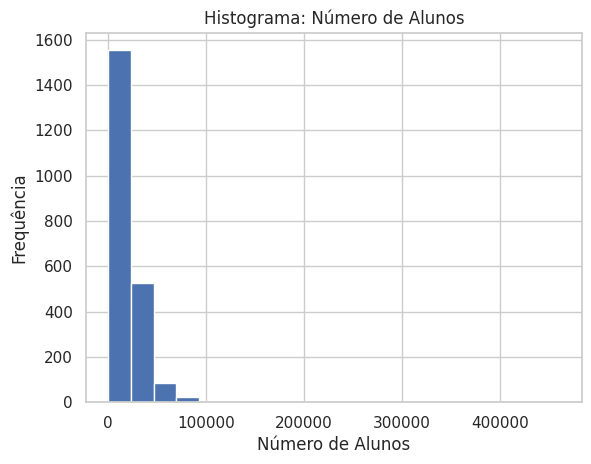

14292.0


,University Rank,No of student,No of student per staff,International Student,OverAll Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Gender
0,1,20965.0,10.6,42.000000,96.4,99.7,99.0,74.9,96.2,0
1,2,21887.0,9.6,25.000000,95.2,99.0,99.3,49.5,80.5,2
2,3,20185.0,11.3,39.000000,94.8,99.5,97.0,54.2,95.8,0
3,3,16164.0,7.1,24.000000,94.8,96.7,99.8,65.0,79.8,0
4,5,11415.0,8.2,33.000000,94.2,93.6,99.8,90.9,89.3,0
...,...,...,...,...,...,...,...,...,...,...
2336,-,14292.0,16.6,10.126473,34.0–39.2,15.5,61.5,37.9,76.8,1
2337,-,14292.0,16.6,10.126473,34.0–39.2,29.4,34.5,44.2,88.7,1
2338,-,14292.0,16.6,10.126473,34.0–39.2,14.3,68.8,37.3,72.0,1
2339,-,14292.0,16.6,10.126473,34.0–39.2,26.7,52.8,52.1,47.6,1


In [22]:
#Tratando a coluna No of student
#remover as virgulas dos dados
df_remove_correlacao['No of student'] = pd.to_numeric(df_remove_correlacao['No of student'].str.replace(',', ''), errors='coerce')


plt.hist(df_remove_correlacao['No of student'], bins=20)
plt.xlabel('Número de Alunos')
plt.ylabel('Frequência')
plt.title('Histograma: Número de Alunos')
plt.show()

#tratando valores nulos com a mediana já que existe um pico muito definido
media_value = df_remove_correlacao['No of student'].median()
print(media_value)
df_remove_correlacao['No of student'].fillna(media_value, inplace=True)


df_remove_correlacao

In [23]:
df_remove_correlacao.isnull().sum()

University Rank                  0
No of student                    0
No of student per staff          0
International Student            0
OverAll Score                  542
Research Score                   0
Citations Score                542
Industry Income Score          542
International Outlook Score    542
Gender                           0
dtype: int64

In [24]:
#Tratando as colunas Research Score, Citations Score,	Industry Income Score e International Outlook Score
#Todos os dados não apresentam picos centrais de dados logo usaremos a media para dados faltantes
media_value = df_remove_correlacao['Research Score'].mean()
print(media_value)
df_remove_correlacao['Research Score'].fillna(media_value, inplace=True)

media_value = df_remove_correlacao['Citations Score'].mean()
print(media_value)
df_remove_correlacao['Citations Score'].fillna(media_value, inplace=True)

media_value = df_remove_correlacao['Industry Income Score'].mean()
print(media_value)
df_remove_correlacao['Industry Income Score'].fillna(media_value, inplace=True)

media_value = df_remove_correlacao['International Outlook Score'].mean()
print(media_value)
df_remove_correlacao['International Outlook Score'].fillna(media_value, inplace=True)



23.01689827682046
48.4958866036687
47.10455808782657
46.88037798777098


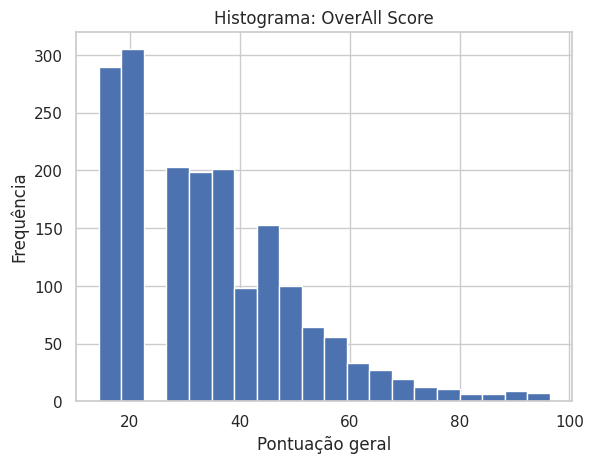

34.16586992773763


In [25]:
#Tratando a coluna OverAll Score
#algumas entradas na coluna contem um intervalo "34.0–39.2"
#escolhemos substituir as entradas com intervalo pelo valor médio do intervalo
def transform_score(score):
    if pd.isna(score) or score.lower() == 'nan':
        return 'NaN'  # Valor nulo ou inválido
    if '–' in score:
        lower, upper = map(float, score.split('–'))
        return (lower + upper) / 2
    return float(score)

df_remove_correlacao['OverAll Score'] = pd.to_numeric(df_remove_correlacao['OverAll Score'].apply(transform_score), errors='coerce')



plt.hist(df_remove_correlacao['OverAll Score'], bins=20) #intervalo de 20
plt.xlabel('Pontuação geral')
plt.ylabel('Frequência')
plt.title('Histograma: OverAll Score')
plt.show()

#Tratando os valores nulos com a media
media_value = df_remove_correlacao['OverAll Score'].mean()
print(media_value)
df_remove_correlacao['OverAll Score'].fillna(media_value, inplace=True)

In [26]:
display(df_remove_correlacao.isnull().sum())
display(df_remove_correlacao)

University Rank                0
No of student                  0
No of student per staff        0
International Student          0
OverAll Score                  0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
Gender                         0
dtype: int64

,University Rank,No of student,No of student per staff,International Student,OverAll Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Gender
0,1,20965.0,10.6,42.000000,96.4,99.7,99.0,74.9,96.2,0
1,2,21887.0,9.6,25.000000,95.2,99.0,99.3,49.5,80.5,2
2,3,20185.0,11.3,39.000000,94.8,99.5,97.0,54.2,95.8,0
3,3,16164.0,7.1,24.000000,94.8,96.7,99.8,65.0,79.8,0
4,5,11415.0,8.2,33.000000,94.2,93.6,99.8,90.9,89.3,0
...,...,...,...,...,...,...,...,...,...,...
2336,-,14292.0,16.6,10.126473,36.6,15.5,61.5,37.9,76.8,1
2337,-,14292.0,16.6,10.126473,36.6,29.4,34.5,44.2,88.7,1
2338,-,14292.0,16.6,10.126473,36.6,14.3,68.8,37.3,72.0,1
2339,-,14292.0,16.6,10.126473,36.6,26.7,52.8,52.1,47.6,1
